In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = data.iloc[:,2:4].values
Y = data.iloc[:, 4].values
print([X.shape, Y.shape])

[(400, 2), (400,)]


In [4]:
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# X[:,0] = LabelEncoder().fit_transform(X[:,0])
# # X = OneHotEncoder().fit_transform(X).toarray()
# X.shape

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
Y_pred = clf.predict(X_test)
print(Y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(Y_test,Y_pred))
cm = confusion_matrix(Y_test,Y_pred)
cm

0.95


array([[55,  3],
       [ 1, 21]], dtype=int64)

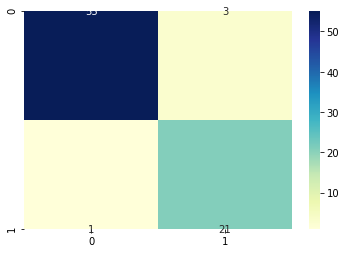

In [10]:
import seaborn as sns
sns.heatmap(cm,cmap="YlGnBu",annot=True)
plt.show()